# Application of MPBNs to the Bladder Tumorigenesis model by Remy et al. 2015

We use Most Permissive Boolean Networks to analyze *reachable* attractors in the logical model published in [(Remy et al., 2015)](https://doi.org/10.1158/0008-5472.CAN-15-0602), by reproducing part of the experiments performed in [Estimating Attractor Reachability in Asynchronous Logical Models (Mendes et al, 2018](https://doi.org/10.3389/fphys.2018.01161) (Table 3).

Note that, currently, the `mpbn` tool does not provide quantification of the propensity of reachable attractors. However, it guarantees their exhaustive identification.

In [1]:
import biolqm
import ginsim
import mpbn
from colomoto_jupyter import tabulate

## Model

### Original multivalued model

Downloading http://ginsim.org/sites/default/files/Bladder_Model.zginml

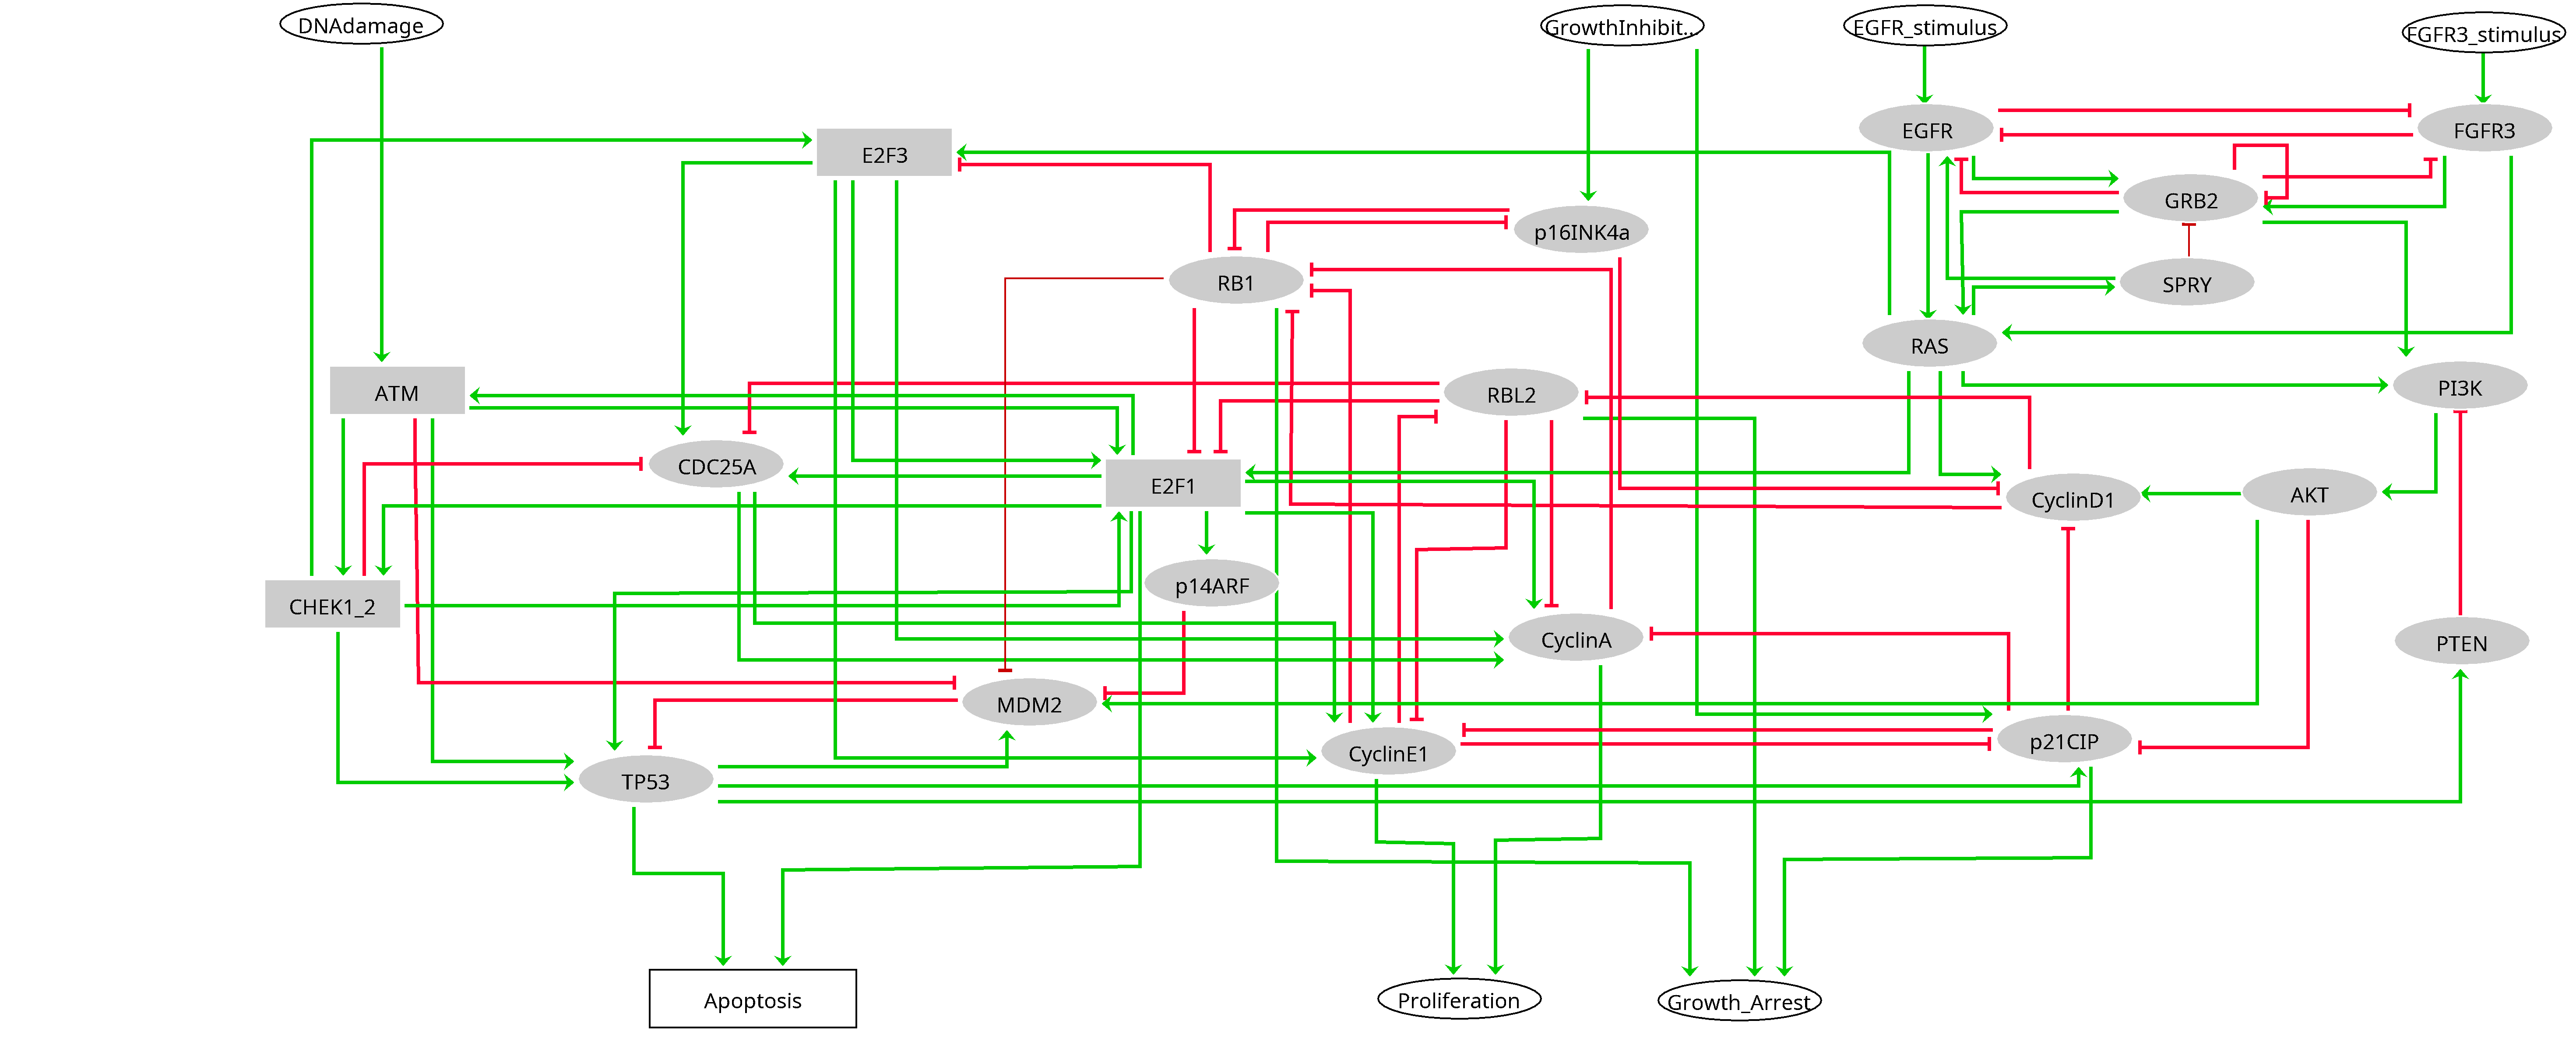

In [2]:
lrg = ginsim.load("http://ginsim.org/sites/default/files/Bladder_Model.zginml")
ginsim.show(lrg)

We use `biolqm` to convert it to a pure Boolean model.

In [3]:
bn = biolqm.to_minibn(biolqm.booleanize(lrg.getModel()))
mbn = mpbn.MPBooleanNetwork(bn)
len(mbn) # display number of components

35

In [4]:
inputs = bn.inputs()
inputs

['DNAdamage', 'EGFR_stimulus', 'FGFR3_stimulus', 'GrowthInhibitors']

In [5]:
outputs = ["Apoptosis_b1", "Growth_Arrest", "Proliferation"]
non_outputs = [n for n in bn if n not in outputs]

## Attractors

We first compute the full list of attractors of the Most Permissive semantics.
We recover exactly the same number as reported in the original publication.

In [6]:
%time a = list(mbn.attractors())
tabulate(a)

CPU times: user 6.12 ms, sys: 1.01 ms, total: 7.14 ms
Wall time: 6.82 ms


,AKT,ATM_b1,ATM_b2,Apoptosis_b1,Apoptosis_b2,CDC25A,CHEK1_2_b1,CHEK1_2_b2,CyclinA,CyclinD1,CyclinE1,DNAdamage,E2F1_b1,E2F1_b2,E2F3_b1,E2F3_b2,EGFR,EGFR_stimulus,FGFR3,FGFR3_stimulus,GRB2,GrowthInhibitors,Growth_Arrest,MDM2,PI3K,PTEN,Proliferation,RAS,RB1,RBL2,SPRY,TP53,p14ARF,p16INK4a,p21CIP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1
7,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0
8,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0
9,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0


To have a better overview of the input/output behaviour, we display the attractors by selecting only input and output components and then only output components.

In [7]:
tabulate(a, columns=inputs+outputs)

,DNAdamage,EGFR_stimulus,FGFR3_stimulus,GrowthInhibitors,Apoptosis_b1,Growth_Arrest,Proliferation
0,0,0,0,0,0,1,0
1,0,0,0,1,0,1,0
2,0,0,1,0,0,0,1
3,0,0,1,1,0,0,1
4,0,0,1,1,0,1,0
5,0,1,0,0,0,*,*
6,0,1,0,1,0,1,0
7,0,1,1,0,0,0,1
8,0,1,1,1,0,0,1
9,0,1,1,1,0,1,0


In [8]:
tabulate(a, columns=outputs)

,Apoptosis_b1,Growth_Arrest,Proliferation
0,0,0,1
1,0,1,0
2,0,*,*
3,1,1,0


## Reachable attractors

For different input settings, and starting from all the other nodes being inactive, we compute the reachable attractors in the wild-type model.

In [9]:
all_zero = dict([(n,0) for n in bn])

In [10]:
init = all_zero.copy()
init["GrowthInhibitors"] = 1
%time a = list(mbn.attractors(reachable_from=init))
tabulate(a, columns=outputs+non_outputs)

CPU times: user 8.46 ms, sys: 27 µs, total: 8.48 ms
Wall time: 7.92 ms


,Apoptosis_b1,Growth_Arrest,Proliferation,AKT,ATM_b1,ATM_b2,Apoptosis_b2,CDC25A,CHEK1_2_b1,CHEK1_2_b2,CyclinA,CyclinD1,CyclinE1,DNAdamage,E2F1_b1,E2F1_b2,E2F3_b1,E2F3_b2,EGFR,EGFR_stimulus,FGFR3,FGFR3_stimulus,GRB2,GrowthInhibitors,MDM2,PI3K,PTEN,RAS,RB1,RBL2,SPRY,TP53,p14ARF,p16INK4a,p21CIP
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1


In [11]:
init = all_zero.copy()
init["EGFR_stimulus"] = 1
%time a = list(mbn.attractors(reachable_from=init))
tabulate(a, columns=outputs+non_outputs)

CPU times: user 10.2 ms, sys: 60 µs, total: 10.2 ms
Wall time: 9.19 ms


,Apoptosis_b1,Growth_Arrest,Proliferation,AKT,ATM_b1,ATM_b2,Apoptosis_b2,CDC25A,CHEK1_2_b1,CHEK1_2_b2,CyclinA,CyclinD1,CyclinE1,DNAdamage,E2F1_b1,E2F1_b2,E2F3_b1,E2F3_b2,EGFR,EGFR_stimulus,FGFR3,FGFR3_stimulus,GRB2,GrowthInhibitors,MDM2,PI3K,PTEN,RAS,RB1,RBL2,SPRY,TP53,p14ARF,p16INK4a,p21CIP
0,0,*,*,*,0,0,0,*,0,0,*,*,*,0,*,0,*,0,*,1,0,0,*,0,*,*,0,*,*,*,*,0,*,0,0


In [12]:
init = all_zero.copy()
init["EGFR_stimulus"] = 1
init["GrowthInhibitors"] = 1
%time a = list(mbn.attractors(reachable_from=init))
tabulate(a, columns=outputs+non_outputs)

CPU times: user 10.3 ms, sys: 7 µs, total: 10.3 ms
Wall time: 9.25 ms


,Apoptosis_b1,Growth_Arrest,Proliferation,AKT,ATM_b1,ATM_b2,Apoptosis_b2,CDC25A,CHEK1_2_b1,CHEK1_2_b2,CyclinA,CyclinD1,CyclinE1,DNAdamage,E2F1_b1,E2F1_b2,E2F3_b1,E2F3_b2,EGFR,EGFR_stimulus,FGFR3,FGFR3_stimulus,GRB2,GrowthInhibitors,MDM2,PI3K,PTEN,RAS,RB1,RBL2,SPRY,TP53,p14ARF,p16INK4a,p21CIP
0,0,1,0,*,0,0,0,0,0,0,0,0,0,0,0,0,*,0,*,1,0,0,*,1,*,*,0,*,0,1,*,0,0,1,*


In [13]:
init = all_zero.copy()
init["EGFR_stimulus"] = 1
init["FGFR3_stimulus"] = 1
init["GrowthInhibitors"] = 1
%time a = list(mbn.attractors(reachable_from=init))
tabulate(a, columns=outputs+non_outputs)

CPU times: user 11 ms, sys: 0 ns, total: 11 ms
Wall time: 9.83 ms


,Apoptosis_b1,Growth_Arrest,Proliferation,AKT,ATM_b1,ATM_b2,Apoptosis_b2,CDC25A,CHEK1_2_b1,CHEK1_2_b2,CyclinA,CyclinD1,CyclinE1,DNAdamage,E2F1_b1,E2F1_b2,E2F3_b1,E2F3_b2,EGFR,EGFR_stimulus,FGFR3,FGFR3_stimulus,GRB2,GrowthInhibitors,MDM2,PI3K,PTEN,RAS,RB1,RBL2,SPRY,TP53,p14ARF,p16INK4a,p21CIP
0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,1,0,1,1,0,0,1,1


## Attractors with model perturbations

We reproduce the analysis of attractors under various mutations, focusing when `DNAdamage` is off. They match with Table 2 of [(Remy et al., 2015)](https://doi.org/10.3389/fbioe.2014.00086).

In [14]:
%time a = list(mbn.attractors(constraints={"DNAdamage":0}))
tabulate(a, columns=outputs)

CPU times: user 7.73 ms, sys: 1.04 ms, total: 8.77 ms
Wall time: 7.45 ms


,Apoptosis_b1,Growth_Arrest,Proliferation
0,0,0,1
1,0,1,0
2,0,*,*


In [15]:
bn_mut = mbn.copy()
bn_mut["FGFR3"] = 1
%time a = list(bn_mut.attractors(constraints={"DNAdamage":0}))
tabulate(a, columns=outputs)

CPU times: user 6.33 ms, sys: 905 µs, total: 7.24 ms
Wall time: 6.42 ms


,Apoptosis_b1,Growth_Arrest,Proliferation
0,0,0,1
1,0,1,0


In [16]:
bn_mut = mbn.copy()
bn_mut["PI3K"] = 1
%time a = list(bn_mut.attractors(constraints={"DNAdamage":0}))
tabulate(a, columns=outputs)

CPU times: user 7.59 ms, sys: 6 µs, total: 7.6 ms
Wall time: 6.67 ms


,Apoptosis_b1,Growth_Arrest,Proliferation
0,0,0,0
1,0,0,1
2,0,0,*
3,0,1,0


In [17]:
bn_mut = mbn.copy()
bn_mut["PI3K"] = 1
bn_mut["FGFR3"] = 1
%time a = list(bn_mut.attractors(constraints={"DNAdamage":0}))
tabulate(a, columns=outputs)

CPU times: user 8.13 ms, sys: 6 µs, total: 8.14 ms
Wall time: 7.05 ms


,Apoptosis_b1,Growth_Arrest,Proliferation
0,0,0,1
1,0,1,0


In [18]:
bn_mut = mbn.copy()
bn_mut["PI3K"] = 1
bn_mut["FGFR3"] = 1
bn_mut["p16INK4a"] = 0
%time a = list(bn_mut.attractors(constraints={"DNAdamage":0}))
tabulate(a, columns=outputs)

CPU times: user 6.14 ms, sys: 65 µs, total: 6.2 ms
Wall time: 5.33 ms


,Apoptosis_b1,Growth_Arrest,Proliferation
0,0,0,1
